# Gruppe D - Gummistiefel B

In [91]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from request_tool import getRequest
from graph_tool import getMap

## Collect Dataset

Request all events

In [28]:
response = requests.get("http://rz-vm154.gfz-potsdam.de:8080/highprecip/events/query") 
json = response.json()

In [31]:
len(json)

300527

Get all timeseries for each event and append

In [ ]:
dfs = []
num_events = len(json)

for index, event in enumerate(json):
    print("Requesting {}/{}".format(index, num_events))
    
    event_id = event['id']
    event_area = event['area']
    event_length = event['length']
    event_si = event['si']
    event_start = event['start']

    response = getRequest(event_id)
    event_dict = response.json()

    for timeserie in event_dict["timeseries"]:       
        timeserie["event_area"] = event_area
        timeserie["event_length"] = event_length
        timeserie["event_si"] = event_si
        timeserie["event_start"] = event_start
        dfs.append(timeserie)

Transform to dataframe and export as pickle

In [ ]:
data = pd.DataFrame(dfs)
data = data.rename(columns={'index':'event_id'})
data.to_pickle("events_all.pickle")

## EDA

In [23]:
events = pd.read_pickle("events_all.pickle")

In [35]:
len(events)

423405

In [116]:
#Check if dataset is complete
length = len(events.drop_duplicates(subset='event_id', keep='first'))
mean_length = events.drop_duplicates(subset='event_id', keep='first').event_length.mean()
total_events = length * mean_length

print('Unique Events: ', length)
print('Mean Length per unique event: ' , mean_length)
print('Total Events: ' , total_events)

Unique Events:  300527
Mean Length per unique event:  1.4088750761162891
Total Events:  423405.0


In [36]:
events.head()

event_id event_start  event_area  event_length  event_si  \
0  199900001  1999-01-01        0.01             1       0.0   
1  199900002  1999-01-01        0.06             3       0.0   
2  199900002  1999-01-01        0.06             3       0.0   
3  199900002  1999-01-01        0.06             3       0.0   
4  199900003  1999-01-01        0.03             2       0.0   

                 date  area        lat     latMax    lon  lonMax  maxPrec  \
0 1999-01-01 00:00:00  0.01  44.439999  44.439999   8.64    8.64     7.48   
1 1999-01-01 00:00:00  0.04  43.310001  43.360001   6.57    6.71     9.85   
2 1999-01-01 01:00:00  0.06  43.349998  43.360001   6.63    6.71     9.46   
3 1999-01-01 02:00:00  0.01  43.480000  43.480000   6.83    6.83     7.20   
4 1999-01-01 00:00:00  0.01  39.369999  39.369999  10.18   10.18     5.42   

   meanPre   si  size  stdv  
0     7.48  0.0     1  0.00  
1     8.37  0.0     3  1.14  
2     7.87  0.0     4  0.94  
3     7.20  0.0     1  0.00  
4     5.42  0.0     1  0.00

In [41]:
events.dtypes

event_id                 int64
event_start     datetime64[ns]
event_area             float64
event_length             int64
event_si               float64
date            datetime64[ns]
area                   float64
lat                    float64
latMax                 float64
lon                    float64
lonMax                 float64
maxPrec                float64
meanPre                float64
si                     float64
size                     int64
stdv                   float64
dtype: object

In [42]:
events.describe()

event_id     event_area   event_length       event_si  \
count  4.234050e+05  423405.000000  423405.000000  423405.000000   
mean   1.998901e+08       0.204675       2.635375       0.007599   
std    1.116735e+06       0.657472       3.639056       0.046756   
min    1.979000e+08       0.010000       1.000000       0.000000   
25%    1.989063e+08       0.010000       1.000000       0.000000   
50%    1.999071e+08       0.030000       1.000000       0.000000   
75%    2.009014e+08       0.120000       3.000000       0.000000   
max    2.017065e+08      17.459999      74.000000       2.160000   

                area            lat         latMax            lon  \
count  423405.000000  423405.000000  423405.000000  423405.000000   
mean        0.063341      42.603165      42.603541      13.166938   
std         0.121475       5.423982       5.423683       3.916584   
min         0.010000      34.910000      34.910000       2.610000   
25%         0.010000      38.130001      38.130001       9.740000   
50%         0.030000      41.610001      41.599998      13.300000   
75%         0.060000      45.880001      45.869999      16.350000   
max         3.890000      56.419998      56.419998      20.980000   

              lonMax        maxPrec        meanPre             si  \
count  423405.000000  423405.000000  423405.000000  423405.000000   
mean       13.168049      11.120857       9.401190       0.000557   
std         3.918751       6.993977       4.223281       0.002948   
min         2.610000       1.060000       1.060000       0.000000   
25%         9.740000       7.140000       6.790000       0.000000   
50%        13.300000       9.510000       8.760000       0.000000   
75%        16.350000      13.070000      11.270000       0.000000   
max        20.980000     193.589996     100.209999       0.130000   

                size           stdv  
count  423405.000000  423405.000000  
mean        4.477087       1.044241  
std         8.215628       1.873813  
min         1.000000       0.000000  
25%         1.000000       0.000000  
50%         2.000000       0.200000  
75%         4.000000       1.410000  
max       266.000000      51.349998

In [87]:
grouped_year_max = events.groupby(pd.Grouper(key='event_start', freq="Y")).max().reset_index()
grouped_year_max

event_start   event_id  event_area  event_length  event_si  \
0   1979-12-31  197907394    5.270000            17      0.21   
1   1980-12-31  198005461    3.880000            26      0.30   
2   1981-12-31  198105823    4.460000            20      0.19   
3   1982-12-31  198207509    6.560000            24      0.33   
4   1983-12-31  198305777    3.470000            24      0.18   
5   1984-12-31  198407847    5.050000            44      0.79   
6   1985-12-31  198506199    8.000000            24      0.19   
7   1986-12-31  198608069    5.710000            27      0.25   
8   1987-12-31  198705985    8.260000            25      0.17   
9   1988-12-31  198806805    9.940000            56      1.07   
10  1989-12-31  198906313    5.610000            18      0.33   
11  1990-12-31  199007718    6.930000            24      0.35   
12  1991-12-31  199107293    7.780000            31      0.51   
13  1992-12-31  199206925    3.860000            18      0.14   
14  1993-12-31  199307009    9.040000            27      0.53   
15  1994-12-31  199407636   14.160000            30      1.22   
16  1995-12-31  199506469    4.490000            32      0.25   
17  1996-12-31  199608778    8.290000            35      0.42   
18  1997-12-31  199706849    4.490000            25      0.28   
19  1998-12-31  199806147    5.010000            30      0.18   
20  1999-12-31  199907847    5.670000            29      0.31   
21  2000-12-31  200007581   16.150000            26      1.26   
22  2001-12-31  200106554    6.420000            39      0.24   
23  2002-12-31  200208317    7.730000            17      0.35   
24  2003-12-31  200308663    6.190000            26      0.62   
25  2004-12-31  200407290    7.380000            20      0.21   
26  2005-12-31  200508306    5.670000            36      0.28   
27  2006-12-31  200608905    7.350000            43      0.70   
28  2007-12-31  200706481    7.040000            19      0.35   
29  2008-12-31  200808422    7.450000            38      0.37   
30  2009-12-31  200909540    7.620000            24      0.87   
31  2010-12-31  201008760    8.270000            29      0.41   
32  2011-12-31  201107622   13.710000            33      0.56   
33  2012-12-31  201206916    5.230000            30      0.30   
34  2013-12-31  201308107    8.780000            41      0.47   
35  2014-12-31  201410833   12.310000            42      0.51   
36  2015-12-31  201506661    7.860000            31      0.28   
37  2016-12-31  201609247    8.510000            33      0.43   
38  2017-12-31  201706518   17.459999            74      2.16   

                  date  area        lat     latMax        lon     lonMax  \
0  1979-12-31 16:00:00  2.14  56.410000  56.410000  20.889999  20.889999   
1  1980-12-30 17:00:00  2.32  56.410000  56.410000  20.870001  20.920000   
2  1981-12-31 17:00:00  1.45  56.410000  56.410000  20.860001  20.969999   
3  1982-12-27 14:00:00  2.38  56.410000  56.410000  20.860001  20.860001   
4  1983-12-30 02:00:00  1.06  56.410000  56.410000  20.790001  20.870001   
5  1985-01-01 01:00:00  1.57  56.410000  56.410000  20.900000  20.900000   
6  1985-12-31 23:00:00  2.14  56.410000  56.410000  20.910000  20.930000   
7  1986-12-28 12:00:00  2.04  56.410000  56.410000  20.870001  20.940001   
8  1988-01-01 01:00:00  2.17  56.410000  56.419998  20.950001  20.969999   
9  1988-12-22 13:00:00  2.32  56.410000  56.410000  20.870001  20.980000   
10 1990-01-01 09:00:00  1.08  56.410000  56.419998  20.830000  20.830000   
11 1990-12-27 14:00:00  1.79  56.410000  56.410000  20.830000  20.850000   
12 1991-12-30 07:00:00  3.07  56.410000  56.410000  20.850000  20.910000   
13 1992-12-31 22:00:00  1.34  56.410000  56.410000  20.830000  20.830000   
14 1993-12-29 18:00:00  2.29  56.410000  56.410000  20.799999  20.799999   
15 1994-12-31 04:00:00  2.89  56.410000  56.410000  20.840000  20.900000   
16 1995-12-31 22:00:00  2.00  56.410000  56.410000  20.910000  20.910000   
17 1996-12-31 15:00:00  2.01  56.4

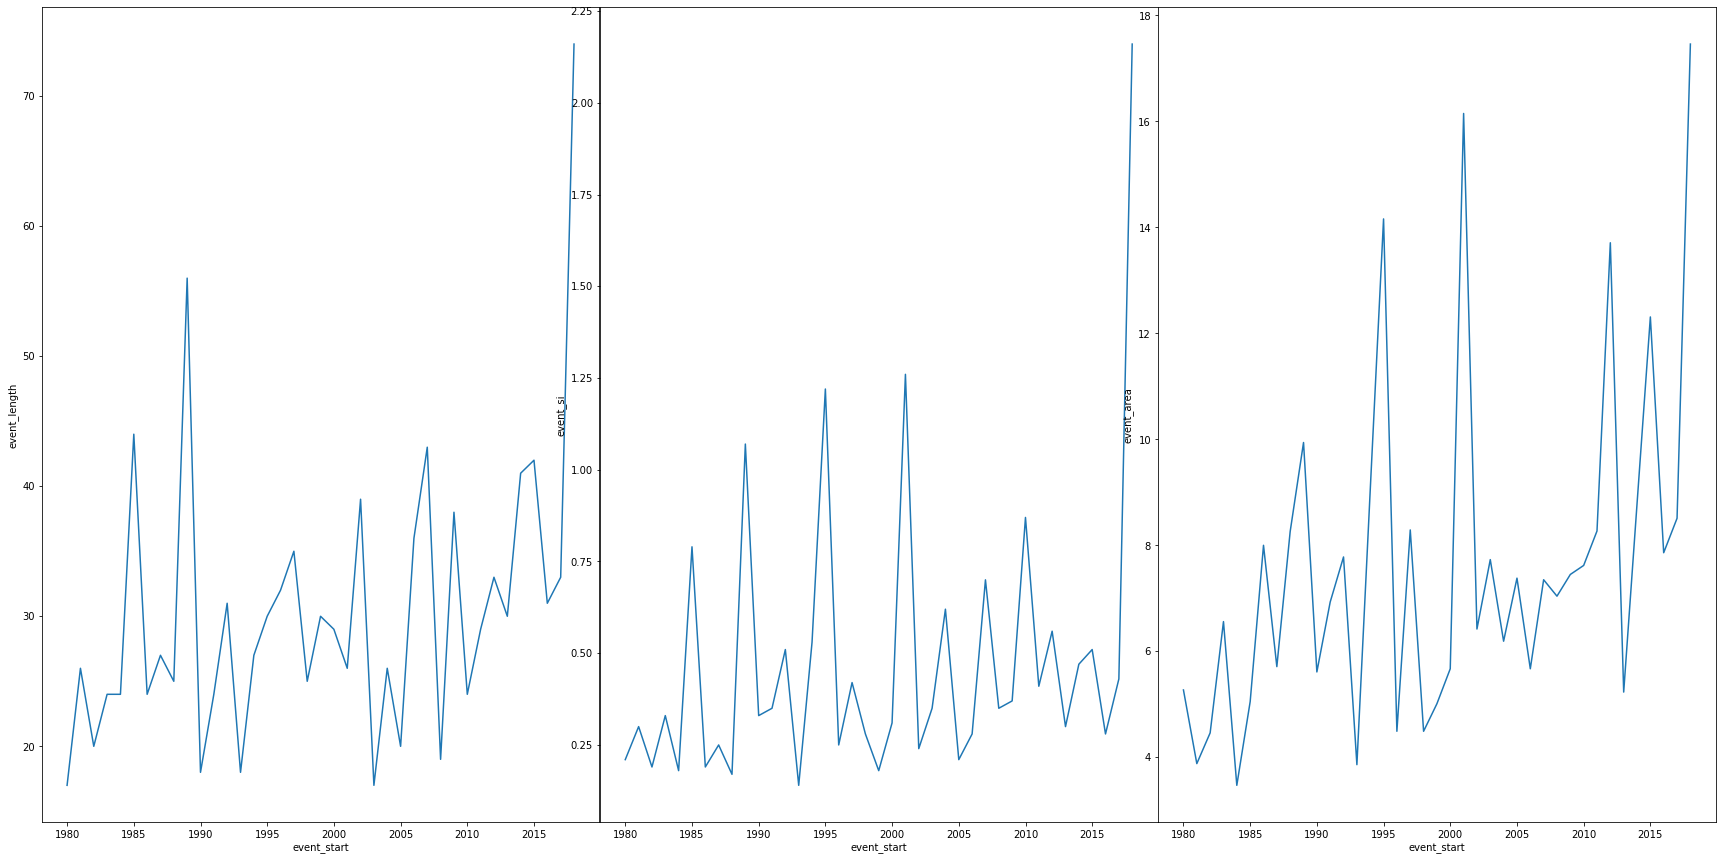

In [96]:
#fig, axs = plt.subplots(ncols=3)
fig, axs = plt.subplots(1,3, figsize=(30, 15))
fig.subplots_adjust(hspace = .5, wspace=.001)

sns.lineplot(x='event_start', y='event_length', data=grouped_year_max, ax=axs[0])
sns.lineplot(x='event_start', y='event_si', data=grouped_year_max, ax=axs[1])
sns.lineplot(x='event_start',y='event_area', data=grouped_year_max, ax=axs[2])

In [80]:
getMap(events[events['event_length'] == events['event_length'].max()])

In [81]:
getMap(events[events['event_length'] > 24])

In [82]:
getMap(events[events['event_start'].dt.year == 2016])

In [83]:
getMap(events[(events['event_start'].dt.year == 2016) & (events['event_start'].dt.month == 7)])

In [117]:
getMap(events[events['event_si'] > 0.3])